In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

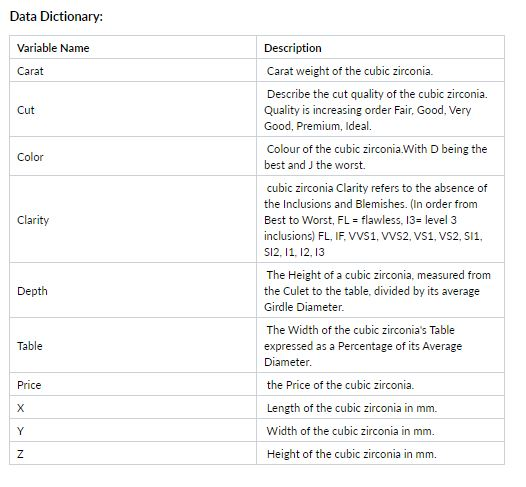

In [2]:
from IPython.display import Image
Image(filename='zircoia dict.jpg',width=600,height=200)

In [3]:
df = pd.read_csv('cubic_zirconia.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


## Droping the variable unnamed:0

In [6]:
df=df.drop(['Unnamed: 0'],axis=1)

# 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [7]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


## Shape of the Dataset

In [9]:
df.shape

(26967, 10)

## Getting unique values

In [10]:
for column in df[['cut','color','clarity']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




## Check for duplicates

In [11]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 34


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


## Removing Duplicates

In [12]:
df = pd.DataFrame.drop_duplicates(df)
print(df.duplicated().sum())

0


## Checking for outliers

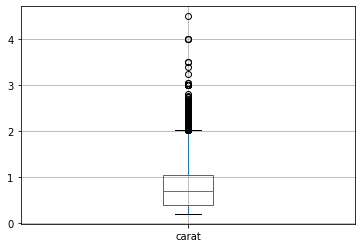

In [13]:
df.boxplot(['carat'])
plt.show()

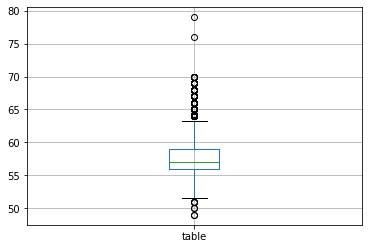

In [14]:
df.boxplot(['table'])
plt.show()

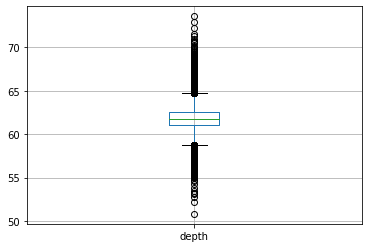

In [15]:
df.boxplot(['depth'])
plt.show()

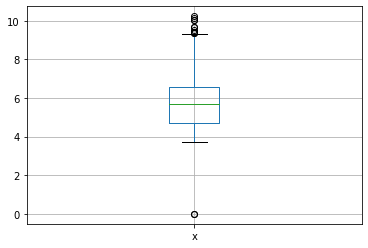

In [16]:
df.boxplot(['x'])
plt.show()

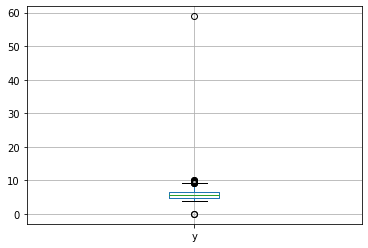

In [17]:
df.boxplot(['y'])
plt.show()

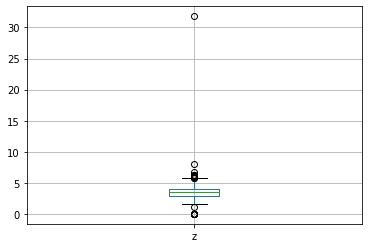

In [18]:
df.boxplot(['z'])
plt.show()

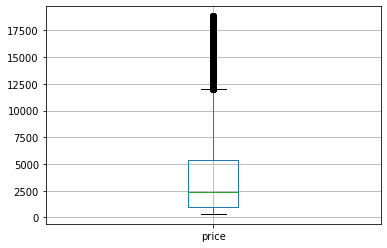

In [19]:
df.boxplot(['price'])
plt.show()

**From this we can observe the outliers in the above variables in the dataset. To obtain better results in linear regression we remove outliers in the dataset.**

## Correlation matrix

In [20]:
df.corr(method='pearson')

,carat,depth,table,x,y,z,price
carat,1.000000,0.035240,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.035240,1.000000,-0.297768,-0.018401,-0.024453,0.101973,-0.002895
table,0.181539,-0.297768,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018401,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024453,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.101973,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002895,0.126844,0.886554,0.856441,0.850682,1.000000


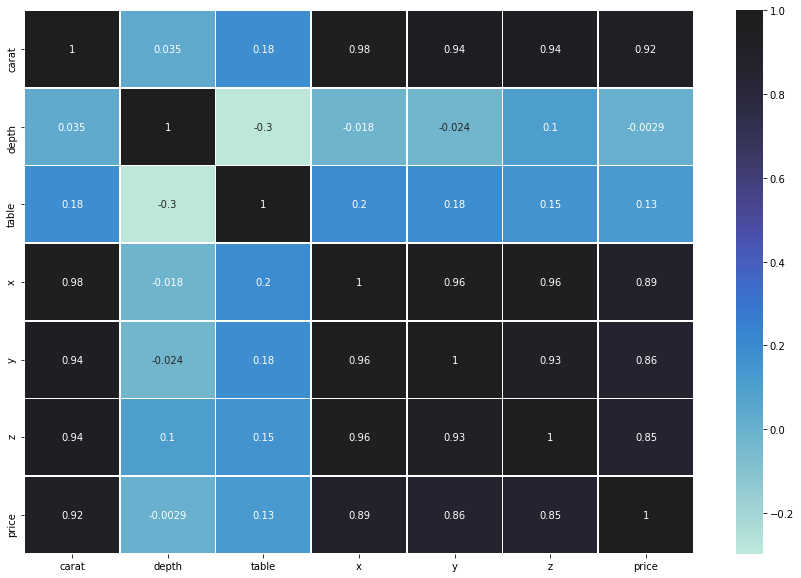

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, center = 1 )  # heatmap
plt.show()

**Variables x and y are 100% correlated while variable z 99% correlated to x and y.Also the parameter x,y and z have very high correlation to the carat of the diamonds. And also carat and price has 94% correlation while price and x,y,z are 91% correlated.**

## Univariate anlysis

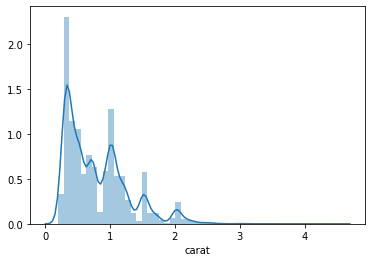

In [22]:
sns.distplot(df.carat)

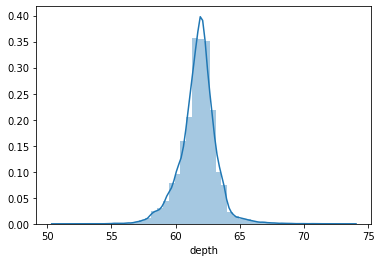

In [23]:
sns.distplot(df.depth)

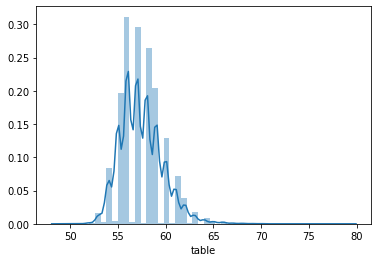

In [24]:
sns.distplot(df.table)

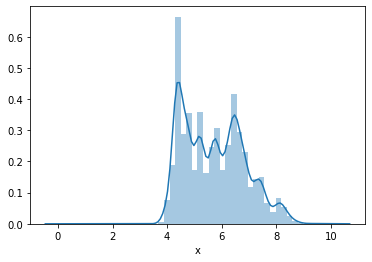

In [25]:
sns.distplot(df.x)

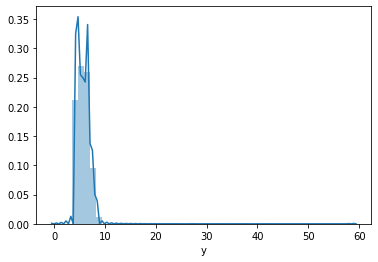

In [26]:
sns.distplot(df.y)

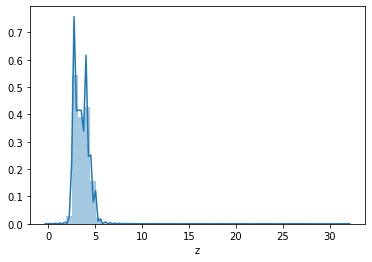

In [27]:
sns.distplot(df.z)

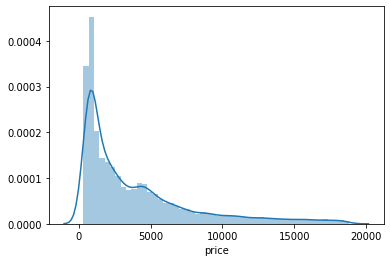

In [28]:
sns.distplot(df.price)

**From this above histograms we can visualise the distribution of various variables of the dataset. The variable price is positively skewed while the variable depth is normally distributed without any skewness.If the variable is otherwise generally normally distributed (and in particular does not have any skewness) then we can impute the missing values with mean of the variable.**

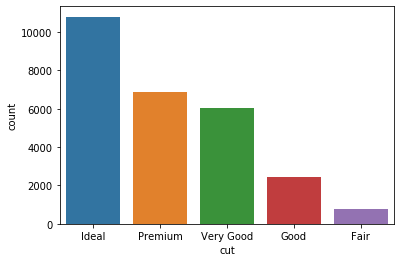

In [29]:
sns.countplot(df.cut)

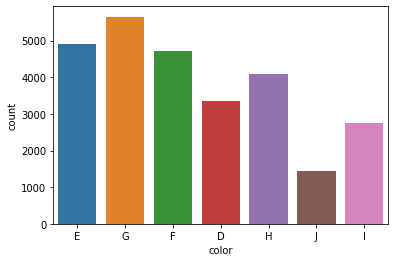

In [30]:
sns.countplot(df.color)

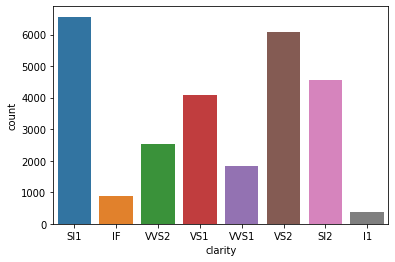

In [31]:
sns.countplot(df.clarity)

## Bivaiate Analysis

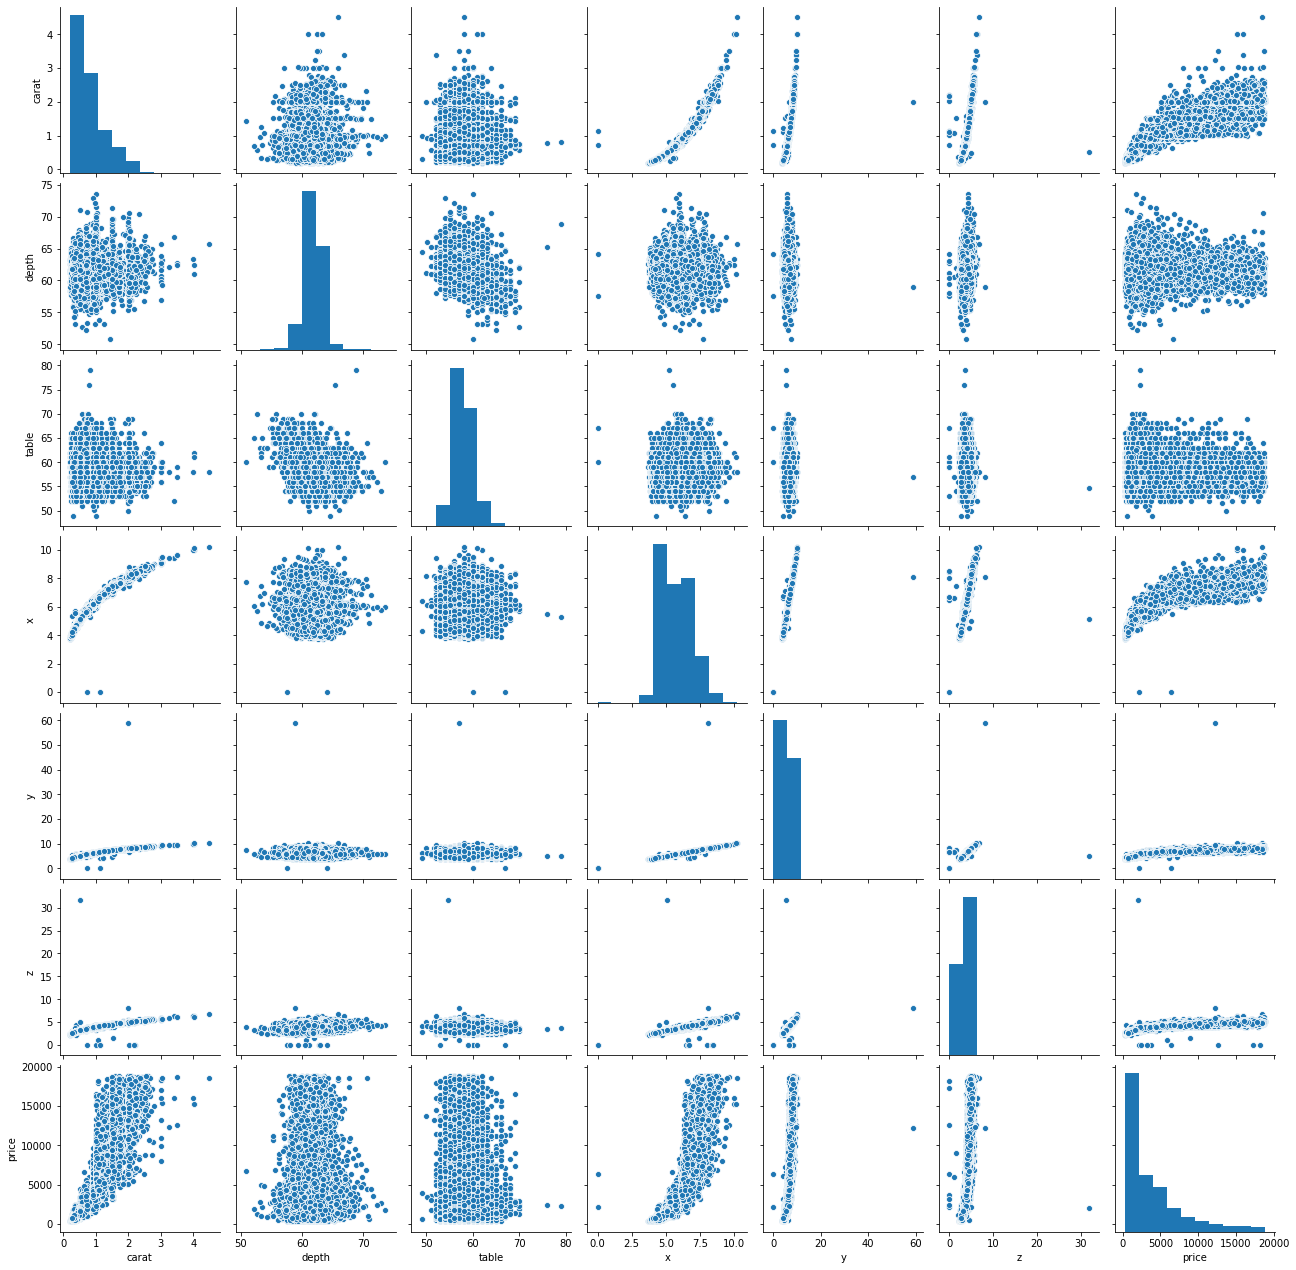

In [32]:
sns.pairplot(df)

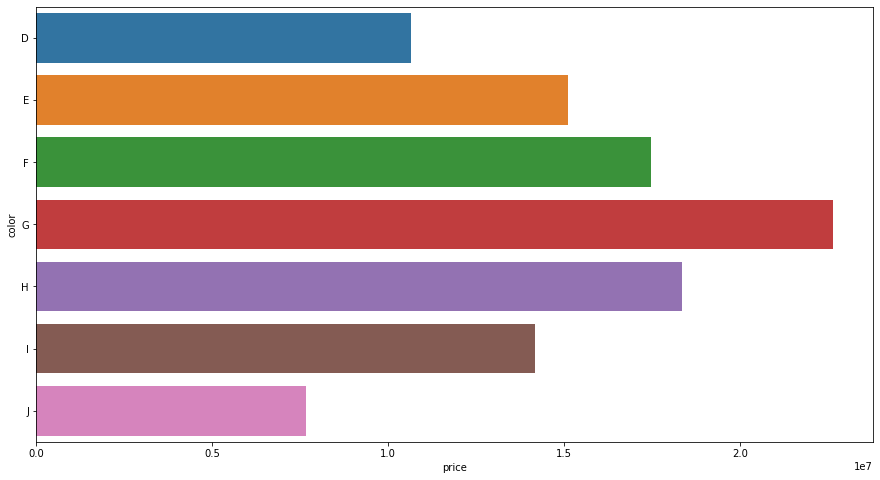

In [33]:
df2 = df[['price','color']].groupby(['color'],as_index=False).sum()
plt.figure(figsize=(15,8))
sns.barplot(df2['price'], df2['color'])
plt.show()

**From this barplot we can see that diamond with color G is sold for high price.followed by color H and color F**

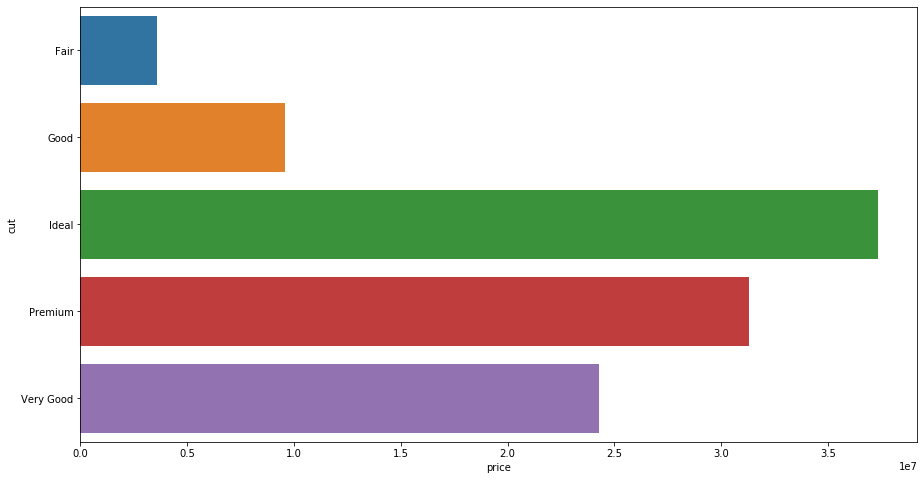

In [34]:
df2 = df[['price','cut']].groupby(['cut'],as_index=False).sum()
plt.figure(figsize=(15,8))
sns.barplot(df2['price'], df2['cut'])
plt.show()

**From this barplot we can see that diamond with cut Ideal is sold for high price.Followed by cut premium and Cut Vey good.**

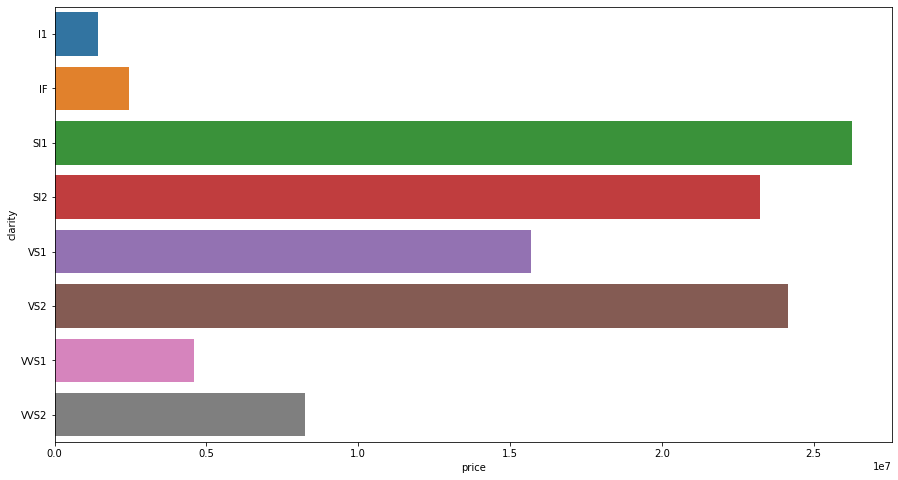

In [35]:
df2 = df[['price','clarity']].groupby(['clarity'],as_index=False).sum()
plt.figure(figsize=(15,8))
sns.barplot(df2['price'], df2['clarity'])
plt.show()

**From this barplot we can see that diamonds with clarity SI1 is sold for high price.Followed by clarity VS2 then clarity SI2.**

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

## Finding missing values in the dataset

In [36]:
cols=df.isnull().sum()[df.isnull().sum()>0].index

In [37]:
cols

Index(['depth'], dtype='object')

In [38]:
objects=df[cols].select_dtypes(include=['object','category']).columns
non_objects=df[cols].select_dtypes(exclude=['object','category']).columns

In [39]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

**Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.**

**From this we can see that there is about 697 null values in this dataset.And replacing the missing values with mean of the variable depth.**

In [40]:
df['depth'] = df['depth'].fillna((df['depth'].mean()))

In [41]:
df['depth'].isnull().sum()

0

**Looking at the box plot, it seems that only min_payment_amt have outlier present in the variables.**

**These outliers value needs to be teated and there are several ways of treating them:**

  - **Drop the outlier value**
  - **Replace the outlier value using the IQR**


In [42]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
    

In [43]:
lcar,ucar=remove_outlier(df['carat'])
df['carat']=np.where(df['carat']>ucar,ucar,df['carat'])
df['carat']=np.where(df['carat']<lcar,lcar,df['carat'])

ltab,utab=remove_outlier(df['table'])
df['table']=np.where(df['table']>utab,utab,df['table'])
df['table']=np.where(df['table']<ltab,ltab,df['table'])

ldep,udep=remove_outlier(df['depth'])
df['depth']=np.where(df['depth']>udep,udep,df['depth'])
df['depth']=np.where(df['depth']<ldep,ldep,df['depth'])

lpr,upr=remove_outlier(df['price'])
df['price']=np.where(df['price']>upr,upr,df['price'])
df['price']=np.where(df['price']<lpr,lpr,df['price'])

lx,ux=remove_outlier(df['x'])
df['x']=np.where(df['x']>ux,ux,df['x'])
df['x']=np.where(df['x']<lx,lx,df['x'])

ly,uy=remove_outlier(df['y'])
df['y']=np.where(df['y']>uy,uy,df['y'])
df['y']=np.where(df['y']<ly,ly,df['y'])

lz,uz=remove_outlier(df['z'])
df['z']=np.where(df['z']>uz,uz,df['z'])
df['z']=np.where(df['z']<lz,lz,df['z'])

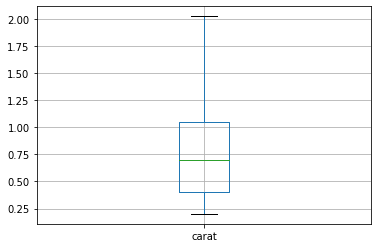

In [44]:
df.boxplot('carat')

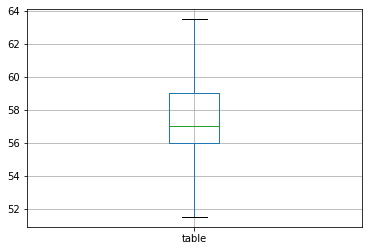

In [45]:
df.boxplot('table')

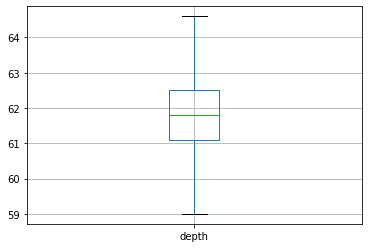

In [46]:
df.boxplot('depth')

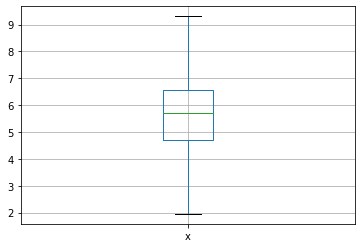

In [47]:
df.boxplot('x')

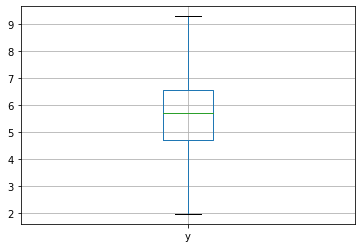

In [48]:
df.boxplot('y')

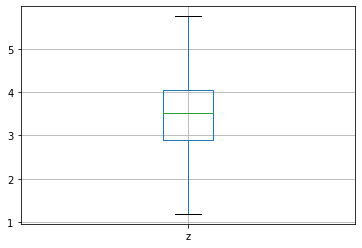

In [49]:
df.boxplot('z')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.5+ MB


## Scaling the data

**Standardization prevents variables with larger scales from dominating how clusters are defined. It allows all variables to be considered by the algorithm with equal importance.**

**As we know that Linear regression is not a distance based algorithm like clustering it is not necessarily required to scale the dataset.Moreover in this problem the scaled and unscaled dateset gives same RMSE and R-Squared value**

# 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE

## Encode the data (having string values) for Modelling

In [51]:
df['cut'] = df['cut'].str.replace('Very Good', 'Very_Good')

In [52]:
df=pd.get_dummies(df,columns=['cut','color','clarity'])
df

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26965,0.27,61.8,56.0,4.19,4.20,2.60,682.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Converting all objects to categorical codes


In [53]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes 

In [54]:
df.head()

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## Train-Test Split

In [55]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [56]:
X.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

## Scaled Dataset

In [58]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

## The Coefficient for the variables of the dataset

In [61]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 9126.93547308569
The coefficient for depth is -15.014217086543956
The coefficient for table is -18.585737800294776
The coefficient for x is -1190.2764345693458
The coefficient for y is 837.3571162351292
The coefficient for z is -163.63972971377282
The coefficient for cut_Fair is -495.6255945121164
The coefficient for cut_Good is -13.812417769734264
The coefficient for cut_Ideal is 219.0206637688877
The coefficient for cut_Premium is 179.1462821300835
The coefficient for cut_Very_Good is 111.27106638287657
The coefficient for color_D is 710.8678283673115
The coefficient for color_E is 528.958114442372
The coefficient for color_F is 454.0552277713927
The coefficient for color_G is 281.4867117579386
The coefficient for color_H is -145.12272090707123
The coefficient for color_I is -613.0612910389914
The coefficient for color_J is -1217.1838703929484
The coefficient for clarity_I1 is -2765.1219546372954
The coefficient for clarity_IF is 1238.8886377109743
The co

**It seems that carat , cut, clarity, color and width of the diamonds are the best 5 attributes that are most important.so as to have better profit share.**

## Intercept of the model

In [62]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 703.747529188945


## Scatter plot representing the Linear Regression of Test and Train dataset

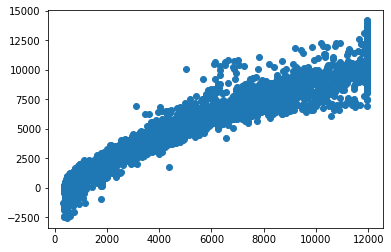

In [63]:
y_pred_test = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred_test)


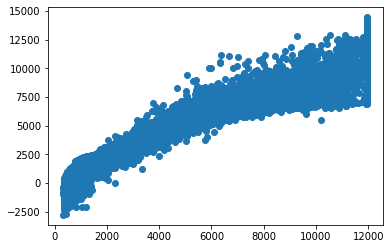

In [64]:
y_pred_train = regression_model.predict(X_train)
plt.scatter(y_train['price'], y_pred_train)

## RMSE And R-Squared Values for Test and Train Dataset

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [66]:
rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

regression_model.fit(X_train,y_train)
scores_train.append(regression_model.score(X_train, y_train))
scores_test.append(regression_model.score(X_test, y_test))
rmse_train.append(np.sqrt(mean_squared_error(y_train,regression_model.predict(X_train))))
rmse_test.append(np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test))))
print('RMSE And R-Squared Values for Test and Train set:\n')


print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test}))

RMSE And R-Squared Values for Test and Train set:

   Train RMSE   Test RMSE  Training Score  Test Score
0  847.455308  837.314535        0.940205    0.941907


## RMSE And R-Squared Values for Test and Train set of scaled dataset

In [67]:
rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]
i=regression_model

i.fit(x_train_scaled,y_train)
scores_train.append(i.score(x_train_scaled, y_train))
scores_test.append(i.score(x_test_scaled, y_test))     
rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))

print('RMSE And R-Squared Values for Test and Train set of scaled dataset:\n')


print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test}))

RMSE And R-Squared Values for Test and Train set of scaled dataset:

   Train RMSE   Test RMSE  Training Score  Test Score
0  847.455308  837.314535        0.940205    0.941907


## OLS Summary

In [68]:
import statsmodels.formula.api as smf

In [69]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
22114,0.34,62.4,60.0,4.41,4.44,2.76,0,0,0,0,...,0,0,0,0,0,0,1,0,0,537.0
2275,0.30,61.2,55.0,4.35,4.31,2.65,0,0,1,0,...,0,0,0,0,0,0,1,0,0,844.0
19183,0.50,62.5,57.0,5.09,5.05,3.17,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1240.0
5030,1.10,63.3,56.0,6.53,6.58,4.15,0,1,0,0,...,0,0,0,0,1,0,0,0,0,4065.0
25414,1.02,61.1,62.0,6.54,6.49,3.98,0,0,0,1,...,0,0,0,0,1,0,0,0,0,4057.0


In [70]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very_Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'price'],
      dtype='object')

In [71]:
expr= 'price ~ carat + depth + table + x + y + z + cut_Fair + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_D + color_E + color_F + color_G + color_H + color_I + color_J + clarity_I1 + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [72]:
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept         479.438706
carat            9126.935473
depth             -15.014217
table             -18.585738
x               -1190.276435
y                 837.357116
z                -163.639730
cut_Fair         -399.737853
cut_Good           82.075323
cut_Ideal         314.908405
cut_Premium       275.034023
cut_Very_Good     207.158808
color_D           779.359072
color_E           597.449358
color_F           522.546471
color_G           349.977955
color_H           -76.631477
color_I          -544.570047
color_J         -1148.692627
clarity_I1      -2705.192116
clarity_IF       1298.818476
clarity_SI1      -185.269987
clarity_SI2     -1020.731405
clarity_VS1       637.381737
clarity_VS2       334.739574
clarity_VVS1     1067.105689
clarity_VVS2     1052.586738
dtype: float64

In [73]:
print(lm1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.287e+04
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        10:00:30   Log-Likelihood:            -1.5386e+05
No. Observations:               18853   AIC:                         3.078e+05
Df Residuals:                   18829   BIC:                         3.080e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       479.4387    444.606      1.078

## Checking Multi colliniearty with VIF

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [76]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1



carat ---> 32.137920351616636
depth ---> 2.848047757118898
table ---> 1.8051690937595921
x ---> 443.1548334623099
y ---> 436.3565411764275
z ---> 105.90390033395792
cut_Fair ---> inf
cut_Good ---> inf
cut_Ideal ---> inf
cut_Premium ---> inf
cut_Very_Good ---> inf


In [77]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(479.44) * Intercept + (9126.94) * carat + (-15.01) * depth + (-18.59) * table + (-1190.28) * x + (837.36) * y + (-163.64) * z + (-399.74) * cut_Fair + (82.08) * cut_Good + (314.91) * cut_Ideal + (275.03) * cut_Premium + (207.16) * cut_Very_Good + (779.36) * color_D + (597.45) * color_E + (522.55) * color_F + (349.98) * color_G + (-76.63) * color_H + (-544.57) * color_I + (-1148.69) * color_J + (-2705.19) * clarity_I1 + (1298.82) * clarity_IF + (-185.27) * clarity_SI1 + (-1020.73) * clarity_SI2 + (637.38) * clarity_VS1 + (334.74) * clarity_VS2 + (1067.11) * clarity_VVS1 + (1052.59) * clarity_VVS2 + 

# 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

**The final Linear Regression equation is** 


**price = (479.44) * Intercept + (9126.94) * carat + (-15.01) * depth + (-18.59) * table + (-1190.28) * x + (837.36) * y + (-163.64) * z + (-399.74) * cut_Fair + (82.08) * cut_Good + (314.91) * cut_Ideal + (275.03) * cut_Premium + (207.16) * cut_Very_Good + (779.36) * color_D + (597.45) * color_E + (522.55) * color_F + (349.98) * color_G + (-76.63) * color_H + (-544.57) * color_I + (-1148.69) * color_J + (-2705.19) * clarity_I1 + (1298.82) * clarity_IF + (-185.27) * clarity_SI1 + (-1020.73) * clarity_SI2 + (637.38) * clarity_VS1 + (334.74) * clarity_VS2 + (1067.11) * clarity_VVS1 + (1052.59) * clarity_VVS2**

**Recommendations.**

1. From this regression equation, we can observe that carat, cut, color, clarity and the width of the diamonds pay a huge role in the profit share of the business


2. When the carat of the diamonds increases then the price increses by 9126 keeping all other predictors constant.So the carat of the increases the profit share.


3. The cut type Good increases the price by 314 while the type Ideal increases the price by 275 keeping all other predictors constant So comparing to other cuts these two cuts(Good and Ideal) increases the profit share by huge margin.


4. The color D, E, F and G increases the price by 779, 597, 522 and 349 respectively by keeping all other predictors constant.So it is recommended to focus more on selling diamonds of color D , E, F and G more to increase the profit share.


5. Simultaneously, The diamond of color H, I and J decreases the price by 76, 544 and 1148 respectively by keeping all other predictors constant.So it is recommended to stop selling or selling less of diamond of color H, I and J to increase the profit of the business.


6. The diamonds of clarity IF, VS1, VS2, VVS1 and VVS2 increases the price by 1298, 637, 334, 1067 and 1052 respectively by keeping all other predictors constant.So it is recommended to focus more on selling diamonds of clarity IF, VS1, VS2, VVS1 and VVS2.Especially the diamonds of clairty IF, VVS1 and VVS2 as they yield high profit.


7. Meanwhile the diamonds of clarity I1, SI1 and SI2 decreases the price by 2705, 185 and 1020 respectively by keeping all other predictors constant.So it is recommended to stop selling or selling less of diamond of clarity I1, SI1 and SI2..Especially the diamonds of clairty I1 should be stopped as it yield very high loss to the business.

 
8. It is also recommended to sell diamonds with high width as it increases the price by 837 by keeping all other predictors constant.

# 2. You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

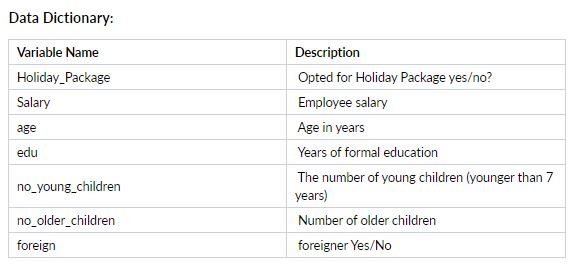

In [78]:
Image(filename='holiday dict.jpg',width=600,height=200)

In [79]:
data = pd.read_csv('Holiday_Package.csv')

In [80]:
data.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [81]:
data=data.drop(['Unnamed: 0'],axis=1)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [83]:
data.describe(include='all')

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


## Shape of the dataset

In [84]:
data.shape

(872, 7)

## Getting the unique values

In [85]:
for column in data[['Holliday_Package','no_young_children','no_older_children','foreign']]:
    print(column.upper(),': ',data[column].nunique())
    print(data[column].value_counts().sort_values())
    print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


NO_YOUNG_CHILDREN :  4
3      5
2     55
1    147
0    665
Name: no_young_children, dtype: int64


NO_OLDER_CHILDREN :  7
6      2
5      2
4     14
3     55
1    198
2    208
0    393
Name: no_older_children, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




## Checking for Duplicates

In [86]:
dup = data.duplicated()
print('Number of duplicates',dup.sum())
data[dup]

Number of duplicates 0


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


**There is no duplicate values.**

## Checking for Missing values

In [87]:
data.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [88]:
data.isna().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

**There is no missing values in the dataset.**

## Converting all object variables to categorical

In [89]:
cleanup_nums_1 = {"no_young_children":  {0: 'Zero', 1: 'One', 2: 'Two', 3: 'Three'}}


In [90]:
data = data.replace(cleanup_nums_1)
data.head()


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,One,1,no
1,yes,37207,45,8,Zero,1,no
2,no,58022,46,9,Zero,0,no
3,no,66503,31,11,Two,0,no
4,no,66734,44,12,Zero,2,no


In [91]:
cleanup_nums_2 = {"no_older_children":  {0: 'Zero', 1: 'One', 2: 'Two', 3: 'Three', 4: 'Four', 5: 'Five', 6: 'Six'}}


In [92]:
data = data.replace(cleanup_nums_2)
data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,One,One,no
1,yes,37207,45,8,Zero,One,no
2,no,58022,46,9,Zero,Zero,no
3,no,66503,31,11,Two,Zero,no
4,no,66734,44,12,Zero,Two,no


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    object
 5   no_older_children  872 non-null    object
 6   foreign            872 non-null    object
dtypes: int64(3), object(4)
memory usage: 47.8+ KB


## Converting Categorical Variables to Integers

In [94]:
for feature in data.columns:
    if data[feature].dtype=='object':
        print('\n')
        print('feature',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature]=pd.Categorical(data[feature]).codes



feature Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature no_young_children
[One, Zero, Two, Three]
Categories (4, object): [One, Three, Two, Zero]
[0 3 2 1]


feature no_older_children
[One, Zero, Two, Four, Three, Five, Six]
Categories (7, object): [Five, Four, One, Six, Three, Two, Zero]
[2 6 5 1 4 0 3]


feature foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int8 
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int8 
 5   no_older_children  872 non-null    int8 
 6   foreign            872 non-null    int8 
dtypes: int64(3), int8(4)
memory usage: 24.0 KB


## Checking for Outliers

In [96]:
print('Shape of the dataset before removing outliers:',data.shape)

Shape of the dataset before removing outliers: (872, 7)


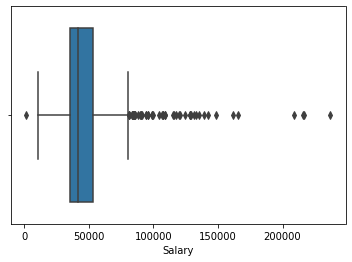

In [97]:
sns.boxplot(data.Salary)

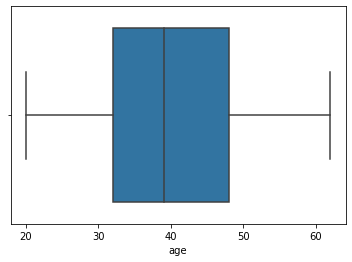

In [98]:
sns.boxplot(data.age)

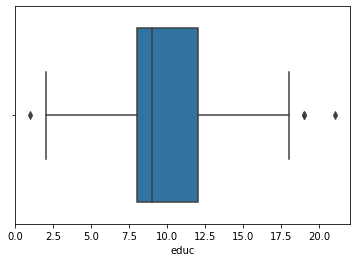

In [99]:
sns.boxplot(data.educ)

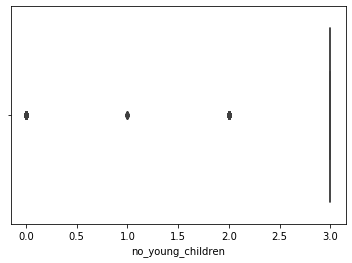

In [100]:
sns.boxplot(data['no_young_children'])

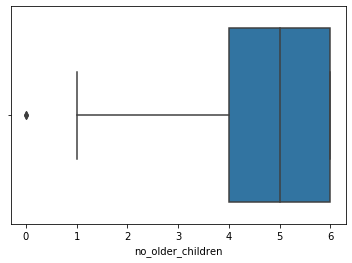

In [101]:
sns.boxplot(data['no_older_children'])

**There are outliers in all the continues vatiables in the dataset. So it is best to remove outliers using Inter Quartile Range(IQR).**

## Removing Outliers

In [102]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [103]:
lsal,usal=remove_outlier(data.Salary)
data.Salary=np.where(data.Salary>usal,usal,data.Salary)
data.Salary=np.where(data.Salary<lsal,lsal,data.Salary)

lage,uage=remove_outlier(data.age)
data.age=np.where(data.age>uage,uage,data.age)
data.age=np.where(data.age<lage,lage,data.age)

ledu,uedu=remove_outlier(data.educ)
data.educ=np.where(data.educ>uedu,uedu,data.educ)
data.educ=np.where(data.educ<ledu,ledu,data.educ)


In [104]:
print('Shape of the dataset after removing outliers:',data.shape)

Shape of the dataset after removing outliers: (872, 7)


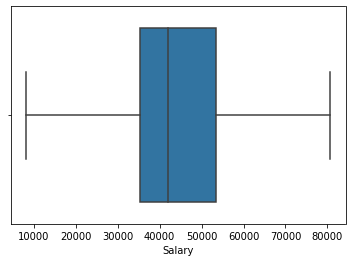

In [105]:
sns.boxplot(data.Salary)

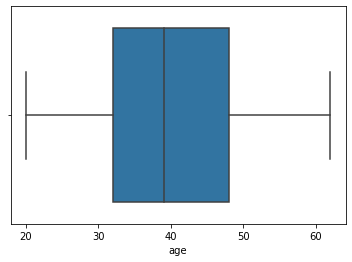

In [106]:
sns.boxplot(data.age)

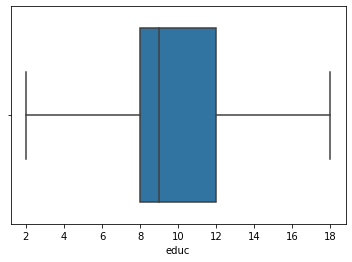

In [107]:
sns.boxplot(data.educ)

## Histograms

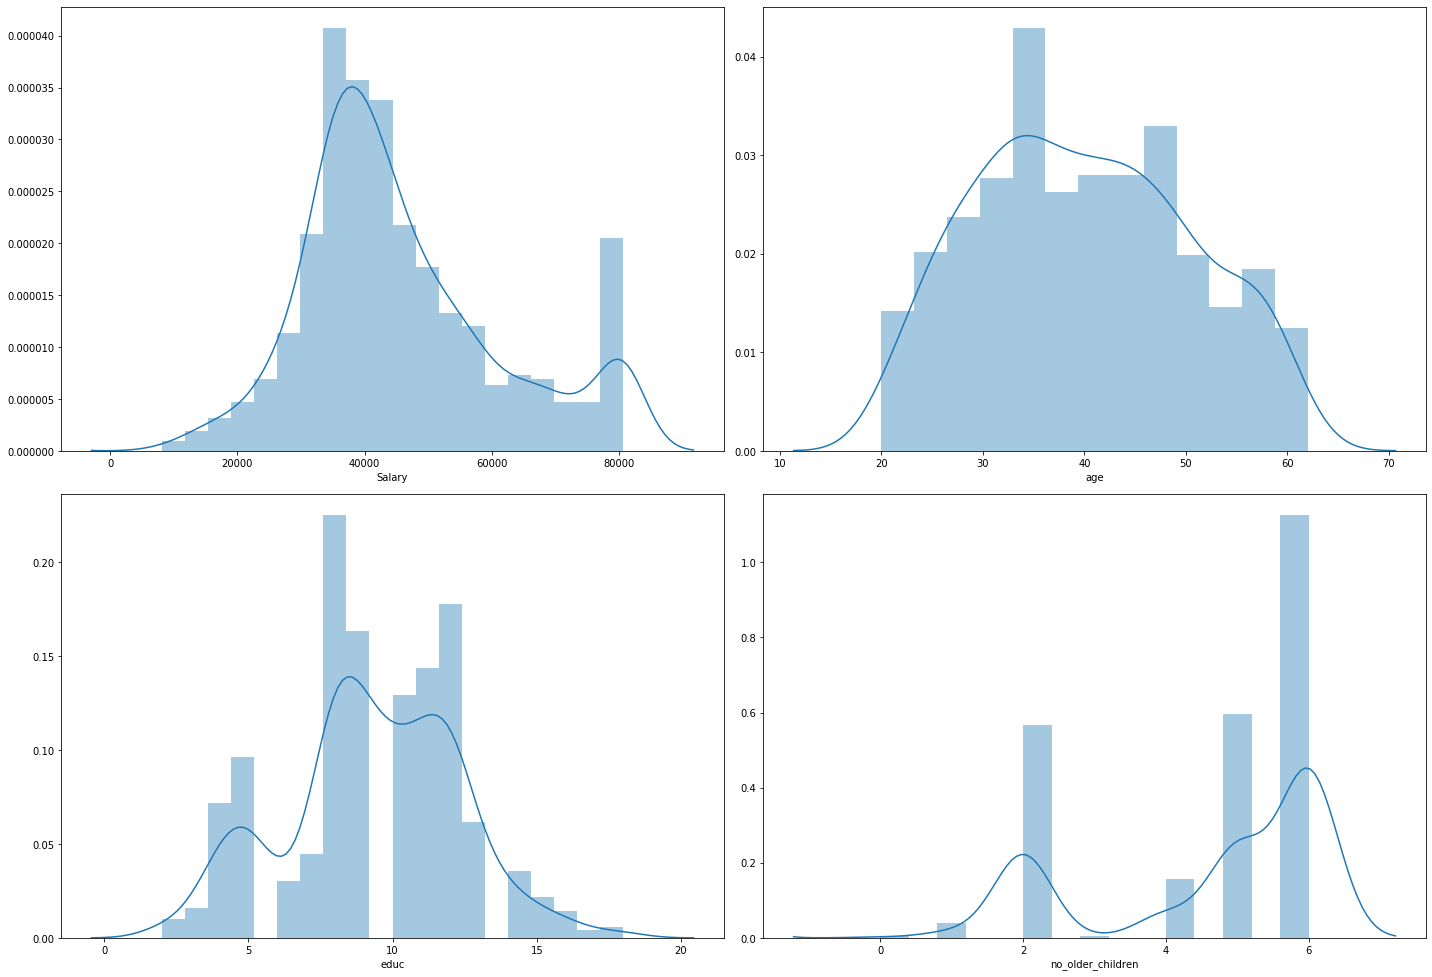

In [108]:
data_plot=data[['Salary','age','educ','no_older_children']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.distplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

## univariate Analysis

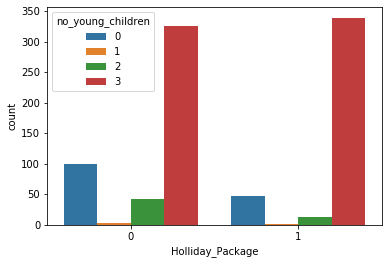

In [109]:
sns.countplot(data.Holliday_Package,hue=data.no_young_children)

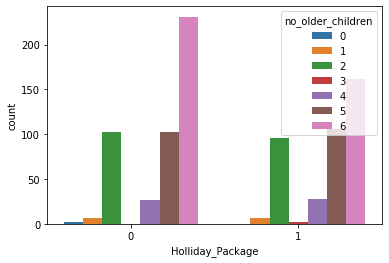

In [110]:
sns.countplot(data.Holliday_Package,hue=data.no_older_children)

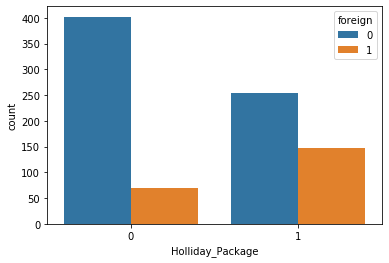

In [111]:
sns.countplot(data.Holliday_Package,hue=data.foreign)

**Here the data shows that most of the holiday packages are opted by foreign employees.**

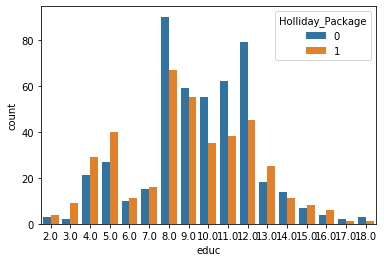

In [112]:
sns.countplot(data.educ,hue=data.Holliday_Package)

**This graph shows that employees with formal education for 8 to 10 years were the ones who mostly opted for holiday packages.**

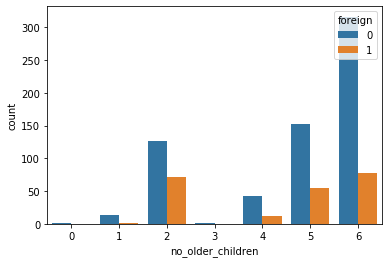

In [113]:
sns.countplot(data['no_older_children'],hue=data.foreign)

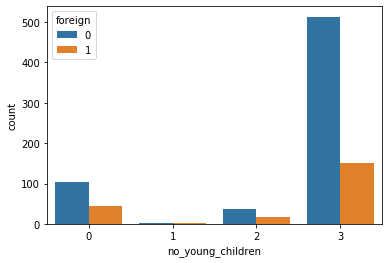

In [114]:
sns.countplot(data['no_young_children'],hue=data.foreign)

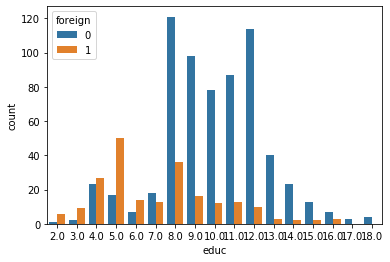

In [115]:
sns.countplot(data.educ,hue=data.foreign)

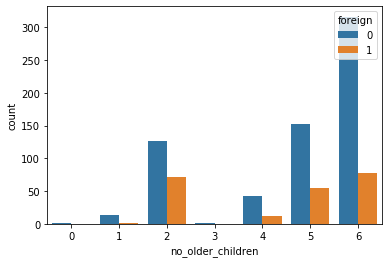

In [116]:
sns.countplot(data['no_older_children'],hue=data.foreign)

## Bivariate Analysis

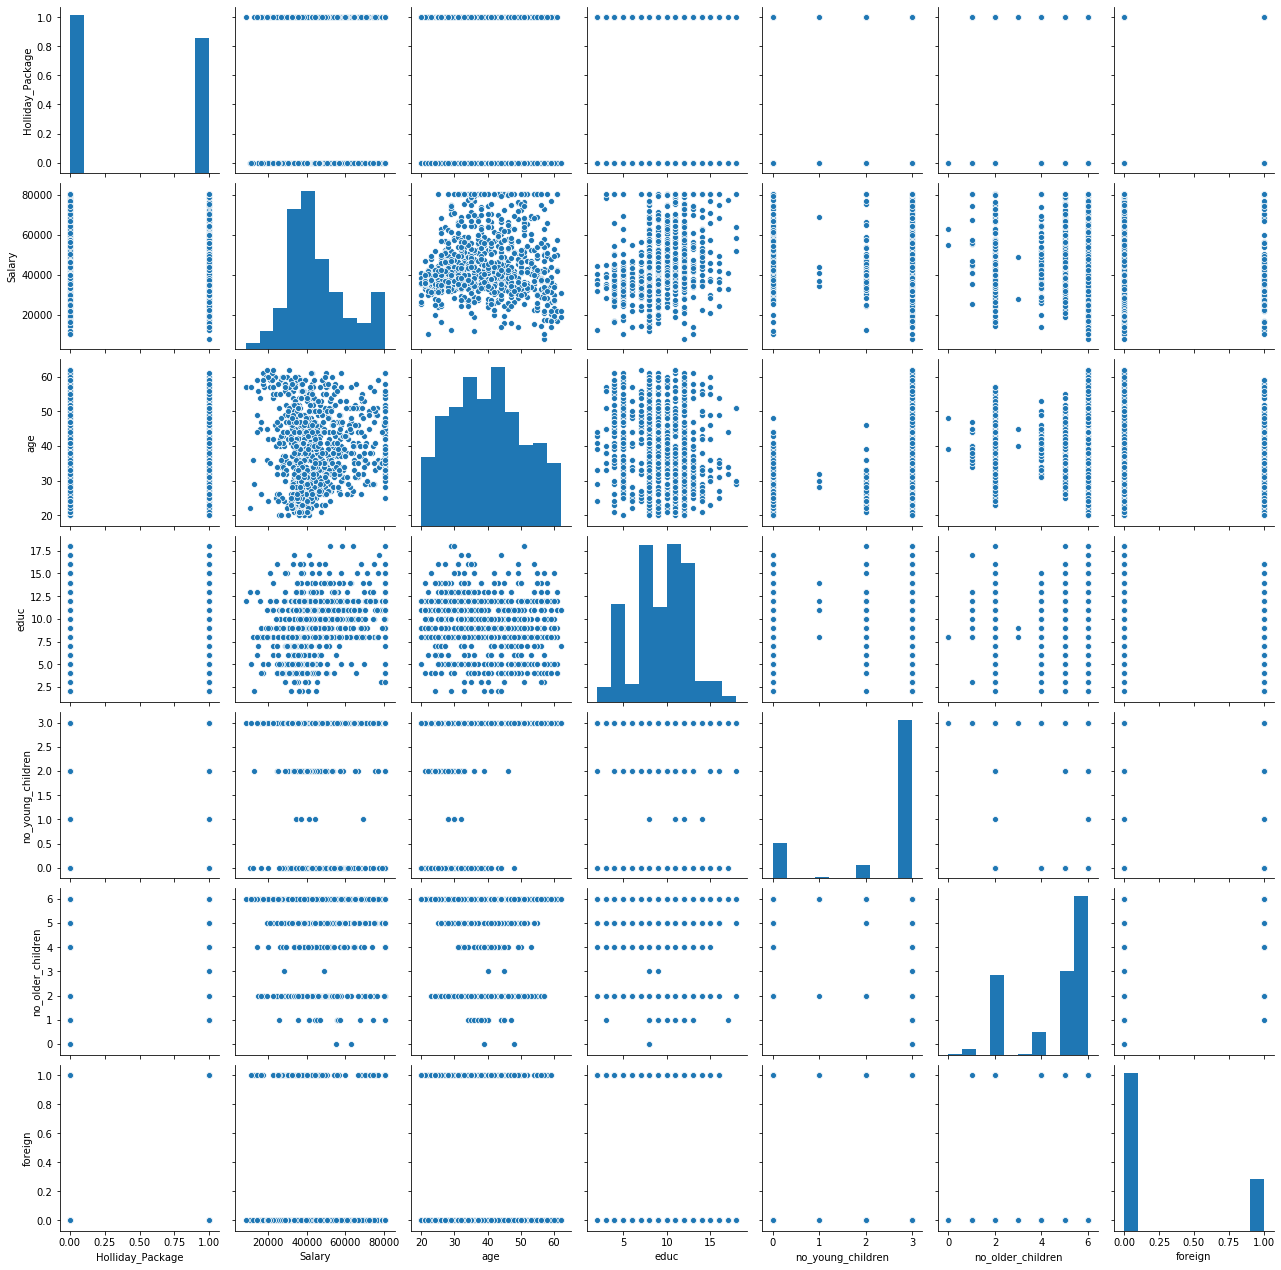

In [117]:
sns.pairplot(data)

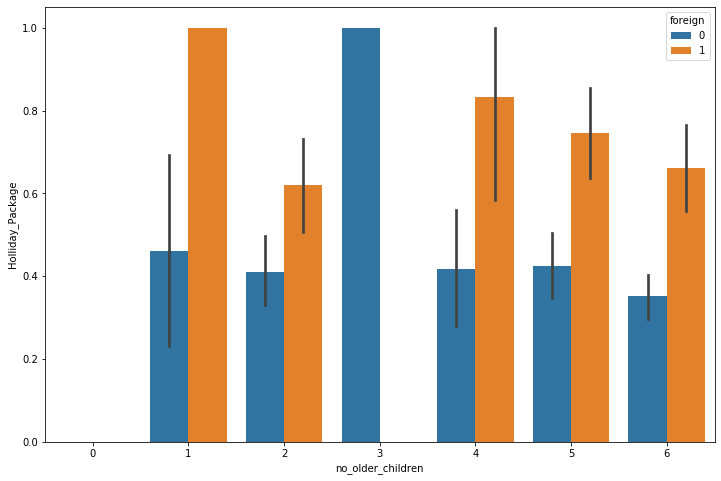

In [118]:
plt.figure(figsize=(12,8))
sns.barplot(x=data.no_older_children,y=data.Holliday_Package,hue=data.foreign)

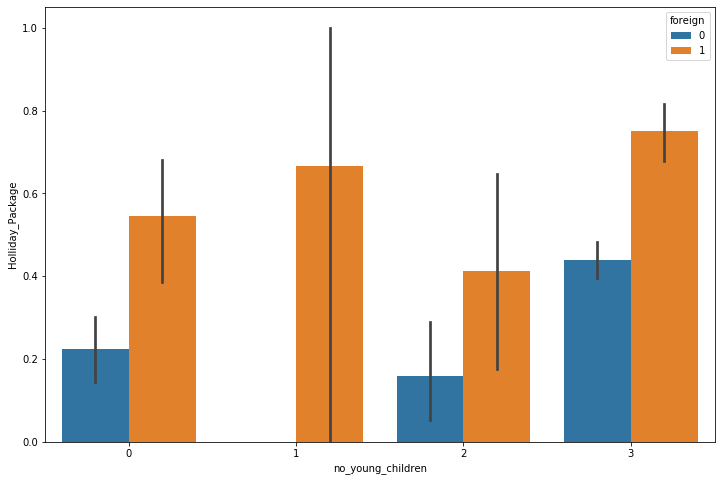

In [119]:
plt.figure(figsize=(12,8))
sns.barplot(x=data.no_young_children,y=data.Holliday_Package,hue=data.foreign)

## Data Correlation 

In [120]:
data.corr()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,1.000000,-0.180214,-0.092311,-0.101116,0.152715,-0.050152,0.254096
Salary,-0.180214,1.000000,0.047029,0.352913,0.042283,-0.060097,-0.239387
age,-0.092311,0.047029,1.000000,-0.149682,0.523382,0.073791,-0.107148
educ,-0.101116,0.352913,-0.149682,1.000000,-0.085164,0.089361,-0.420922
no_young_children,0.152715,0.042283,0.523382,-0.085164,1.000000,0.025747,-0.070016
no_older_children,-0.050152,-0.060097,0.073791,0.089361,0.025747,1.000000,-0.114325
foreign,0.254096,-0.239387,-0.107148,-0.420922,-0.070016,-0.114325,1.000000


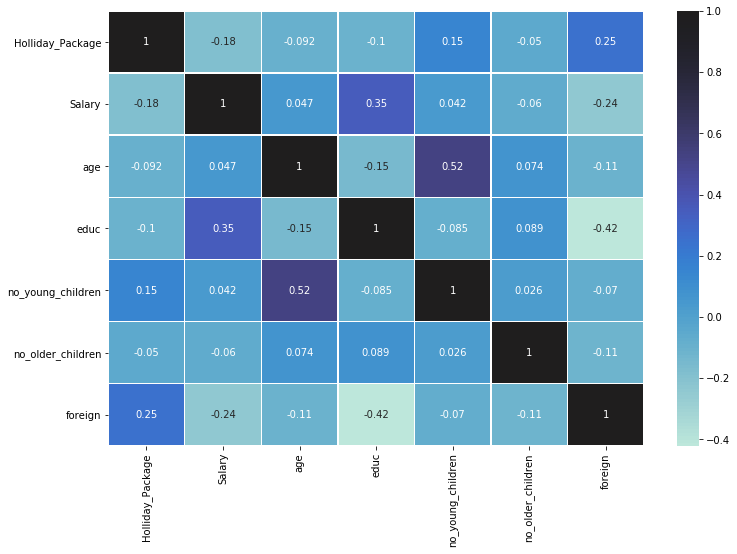

In [121]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,linewidths=.5, center = 1 )
plt.show()

**Here the variables age, number of young children have a corelation of 0.52, education and foreign have a correlation is 0.42, Salary and Education have a correlation have a correlation of 0.35.**

**The variable foreign have a correlation of 0.25 and 0.24 with Holiday package and Salary.**


# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

## Test - Train split of the data set

In [122]:
# Copy all the predictor variables into X dataframe
X = data.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = data[['Holliday_Package']]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [124]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610, 1)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262, 1)


## Logistic regression

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [127]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [128]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001]}

In [129]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [130]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [131]:
grid_search.fit(X_train, y_train)

C:\Users\Pc\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [132]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='newton-cg')


In [133]:
best_model = grid_search.best_estimator_


In [134]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

## Getting the probabilities on the test set

In [135]:


ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.876375,0.123625
1,0.259342,0.740658
2,0.546768,0.453232
3,0.647924,0.352076
4,0.405673,0.594327


## Confusion matrix on the training data

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       326
           1       0.67      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 



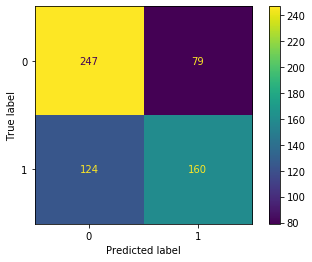

In [136]:


plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

In [137]:
log_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_train_precision=round(df.loc["1"][1],2)
log_train_recall=round(df.loc["1"][2],2)
log_train_f1=round(df.loc["1"][0],2)
print ('log_train_precision ',log_train_precision)
print ('log_train_recall ',log_train_recall)
print ('log_train_f1 ',log_train_f1)

log_train_precision  0.56
log_train_recall  0.61
log_train_f1  0.67


## Confusion matrix on the test data

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262
 



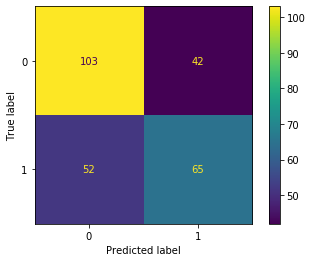

In [138]:


plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [139]:
log_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_test_precision=round(df.loc["1"][1],2)
log_test_recall=round(df.loc["1"][2],2)
log_test_f1=round(df.loc["1"][0],2)
print ('log_test_precision ',log_test_precision)
print ('log_test_recall ',log_test_recall)
print ('log_test_f1 ',log_test_f1)

log_test_precision  0.56
log_test_recall  0.58
log_test_f1  0.61


In [140]:
# Accuracy - Training Data
log_train_acc = best_model.score(X_train, y_train)
log_train_acc

0.6672131147540984

AUC: 0.724


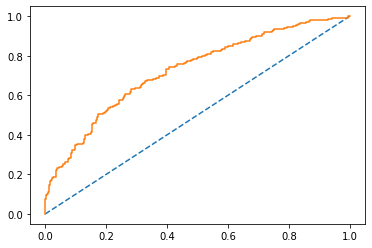

In [141]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
log_train_fpr, log_train_tpr, log_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr);

In [142]:
# Accuracy - Test Data
log_test_acc = best_model.score(X_test, y_test)
log_test_acc

0.6412213740458015

AUC: 0.706


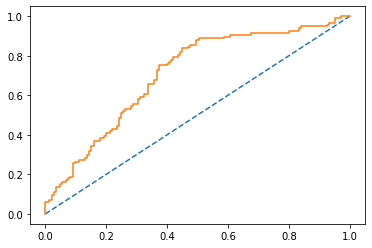

In [143]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
log_test_fpr, log_test_tpr, log_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr);

## Linear Discriminant Analysis

In [144]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [145]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

C:\Users\Pc\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [146]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [147]:
lda_train_acc = model.score(X_train, y_train)
lda_train_acc

0.6672131147540984

In [148]:
# Accuracy - Test Data
lda_test_acc = model.score(X_test, y_test)
lda_test_acc

0.6335877862595419

## Plotting confusion matrix  for the Training and Test Data

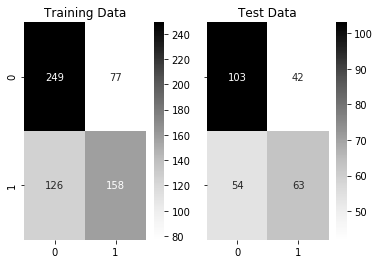

In [149]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)



plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


## Classification Report for Training And Test data

In [150]:
print('Classification Report of the training data:\n\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:


               precision    recall  f1-score   support

           0       0.66      0.76      0.71       326
           1       0.67      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.71      0.68       145
           1       0.60      0.54      0.57       117

    accuracy                           0.63       262
   macro avg       0.63      0.62      0.62       262
weighted avg       0.63      0.63      0.63       262
 



In [151]:
lda_metrics=classification_report(y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_precision=round(df.loc["1"][1],2)
lda_train_recall=round(df.loc["1"][2],2)
lda_train_f1=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.56
lda_train_recall  0.61
lda_train_f1  0.67


In [152]:
lda_metrics=classification_report(y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_precision=round(df.loc["1"][1],2)
lda_test_recall=round(df.loc["1"][2],2)
lda_test_f1=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.54
lda_test_recall  0.57
lda_test_f1  0.6


In [153]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [154]:
pred_prob_train[:,1]

array([0.24633615, 0.52843299, 0.25736301, 0.36747843, 0.5207465 ,
       0.71671442, 0.38034718, 0.26416664, 0.1781339 , 0.24623991,
       0.35829761, 0.21825111, 0.34213306, 0.43594655, 0.25312299,
       0.72891205, 0.79463848, 0.49106752, 0.42946216, 0.88357804,
       0.66474139, 0.16750025, 0.1646479 , 0.64403541, 0.2669263 ,
       0.39385092, 0.67632899, 0.32241417, 0.80984937, 0.29042198,
       0.48310617, 0.74959238, 0.47945205, 0.14288366, 0.34502889,
       0.4767055 , 0.58003001, 0.32077362, 0.37799658, 0.32650552,
       0.46772301, 0.54497382, 0.30918596, 0.80479952, 0.33575723,
       0.74712176, 0.56772789, 0.45661881, 0.34382324, 0.60450355,
       0.5420333 , 0.13397061, 0.62029641, 0.40029   , 0.85872948,
       0.52154883, 0.61070415, 0.2139189 , 0.56848733, 0.47235444,
       0.29032112, 0.37602585, 0.14029701, 0.62177224, 0.30983957,
       0.32399617, 0.52456348, 0.50655471, 0.15847157, 0.55011596,
       0.50274579, 0.23647137, 0.41884041, 0.80417776, 0.36211

##  AUC and ROC for the training data

AUC for the Training Data: 0.724


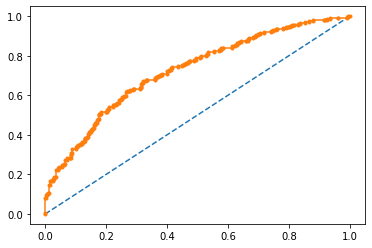

In [155]:


# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label = 'Training Data')




## AUC and ROC for the test data

AUC for the Test Data: 0.707


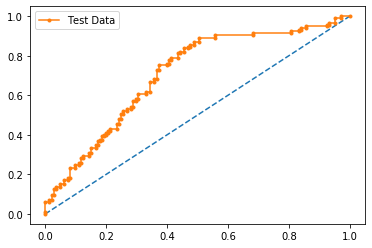

In [156]:


# calculate AUC
lda_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Change the cut-off values for maximum accuracy

0.1 

Accuracy Score 0.4672
F1 Score 0.6352 

Confusion Matrix


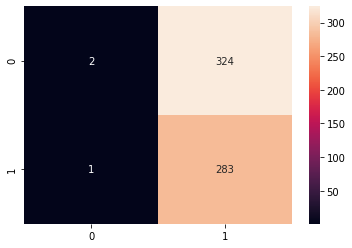

0.2 

Accuracy Score 0.5148
F1 Score 0.6526 

Confusion Matrix


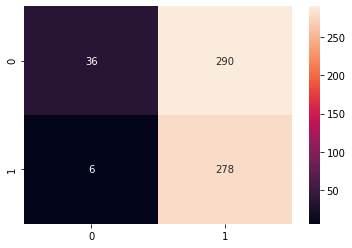

0.3 

Accuracy Score 0.5902
F1 Score 0.6658 

Confusion Matrix


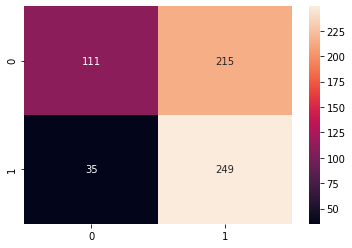

0.4 

Accuracy Score 0.6541
F1 Score 0.6645 

Confusion Matrix


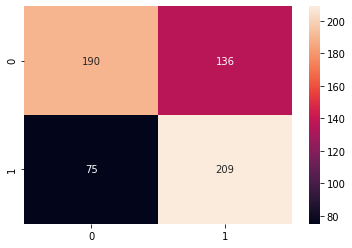

0.5 

Accuracy Score 0.6672
F1 Score 0.6089 

Confusion Matrix


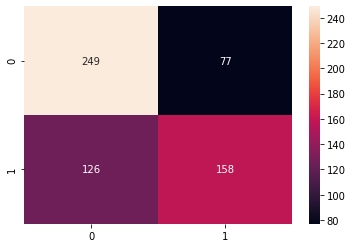

0.6 

Accuracy Score 0.641
F1 Score 0.5011 

Confusion Matrix


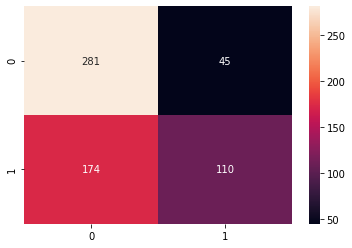

0.7 

Accuracy Score 0.6246
F1 Score 0.399 

Confusion Matrix


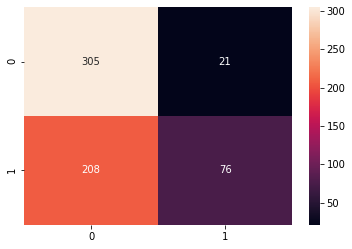

0.8 

Accuracy Score 0.5902
F1 Score 0.2331 

Confusion Matrix


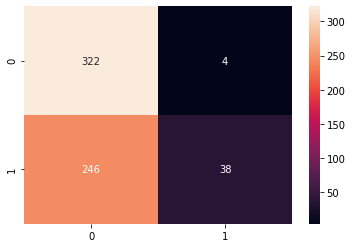

0.9 

Accuracy Score 0.5361
F1 Score 0.007 

Confusion Matrix


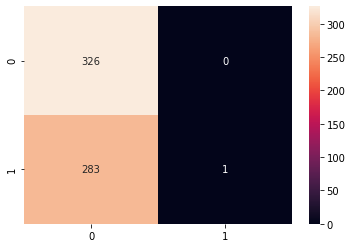

In [158]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

## Comparision of Test and training data for both logistic Regression and Linear Discriminatory Analysis

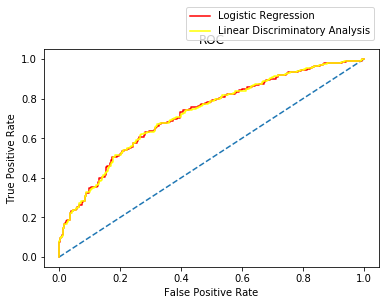

In [159]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_train_fpr, log_train_tpr,color='red',label="Logistic Regression")
plt.plot(lda_train_fpr,lda_train_tpr,color='yellow',label="Linear Discriminatory Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

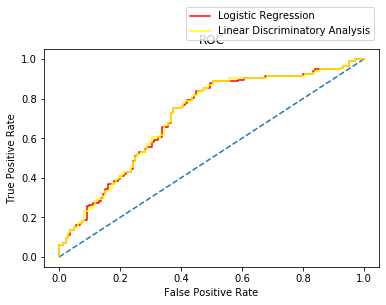

In [160]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_test_fpr, log_test_tpr,color='red',label="Logistic Regression")
plt.plot(lda_test_fpr,lda_test_tpr,color='yellow',label="Linear Discriminatory Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## Comparision of Auc ,Precision and Recall for both Logistic Regression and Linear discriminatory analysis

In [161]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
dt = pd.DataFrame({'Logistic Regression Train':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],
        'Logistic Regression Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
       'Linear Discriminent Analysis Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'Linear Discriminent Analysis Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
       },index=index)
round(dt,2)

,Logistic Regression Train,Logistic Regression Test,Linear Discriminent Analysis Train,Linear Discriminent Analysis Test
Accuracy,0.67,0.64,0.67,0.63
AUC,0.72,0.71,0.72,0.71
Recall,0.61,0.58,0.61,0.57
Precision,0.56,0.56,0.56,0.54
F1 Score,0.67,0.61,0.67,0.60


**From this we can observe that, Logistic regression  has slightly better performance than the Linear Discriminatory Analysis.As it has better accuracy and F1 score.**

**Overall both the models are reasonaly stable enough to be used for making any future predictions.**

# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

## From the correlation heatmap, it is shown that the most important variables are employee salary and whether the employee is foreigner or not

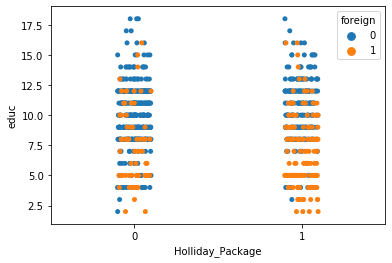

In [162]:
sns.stripplot(y="educ", x="Holliday_Package",hue='foreign', data=data)

**1. Here we can visualize that employees within the bandwidth of 2.5 to 7.5 years of formal education are foreigners and also opted for holiday package. So it is recommended to sell holday packages to foreign employees in this bandwidth as they are more likely to buy the packages.**

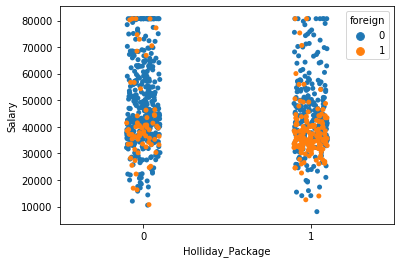

In [163]:
sns.stripplot(y="Salary", x="Holliday_Package",hue='foreign', data=data)

**2. From this we can understand that employees with salary in the bandwidth of 25000 to 40000 are foreigners who opted for holiday package. So it is recommended to focus more on foreign employees in this bandwidth of salaries.**

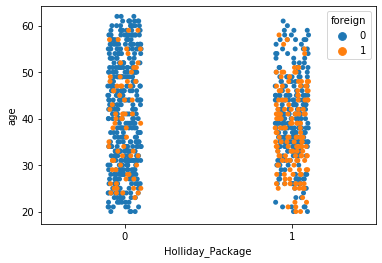

In [164]:
sns.stripplot(y="age", x="Holliday_Package",hue='foreign', data=data)

**3.From the all the three strip plots we can understand that holiday packages are mostly opted by foreign employees then native employees.So it is recommended to focus more on foreign employees.**